In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df_filtered = df[df['bought'] != 0]
df_filtered['time'] = pd.to_datetime(df_filtered['time'])
df_filtered['day_of_week'] = df_filtered['time'].dt.day_name()
df_filtered['time'] = pd.to_datetime(df_filtered['time'])
df_filtered['month'] = df_filtered['time'].dt.month
df_filtered['day'] = df_filtered['time'].dt.day
df_filtered['weekday'] = df_filtered['time'].dt.weekday < 5  # True if it's a weekday
df_filtered = df_filtered.sort_values(by=['user', 'time'])
df_filtered['days_since_last_purchase'] = df_filtered.groupby('user')['time'].diff().dt.days
df_filtered['days_since_last_purchase'] = df_filtered['days_since_last_purchase'].fillna(0)
output_file_path = 'filtered_enhanced_train.csv'
df_filtered.to_csv(output_file_path, index=False)
df_filtered.head()

<ipython-input-2-d0db54b0fbd6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = pd.to_datetime(df_filtered['time'])
<ipython-input-2-d0db54b0fbd6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['time'].dt.day_name()
<ipython-input-2-d0db54b0fbd6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,user,time,bought,day_of_week,month,day,weekday,days_since_last_purchase
2,0,2023-01-04,1,Wednesday,1,4,True,0.0
9,0,2023-01-11,1,Wednesday,1,11,True,7.0
16,0,2023-01-18,1,Wednesday,1,18,True,7.0
23,0,2023-01-25,1,Wednesday,1,25,True,7.0
30,0,2023-02-01,1,Wednesday,2,1,True,7.0


<ipython-input-3-db4d47a967e4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user', y='days_since_last_purchase', data=avg_days_since_last_purchase, palette='viridis')


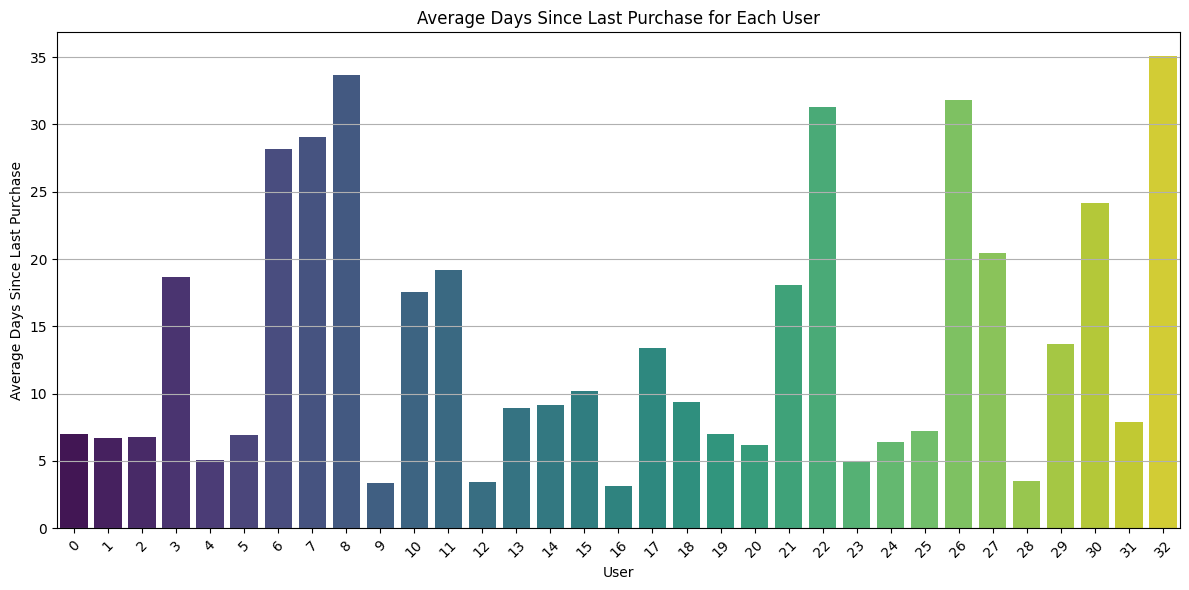

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_days_since_last_purchase = df_filtered.groupby('user')['days_since_last_purchase'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='user', y='days_since_last_purchase', data=avg_days_since_last_purchase, palette='viridis')
plt.title('Average Days Since Last Purchase for Each User')
plt.xlabel('User')
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

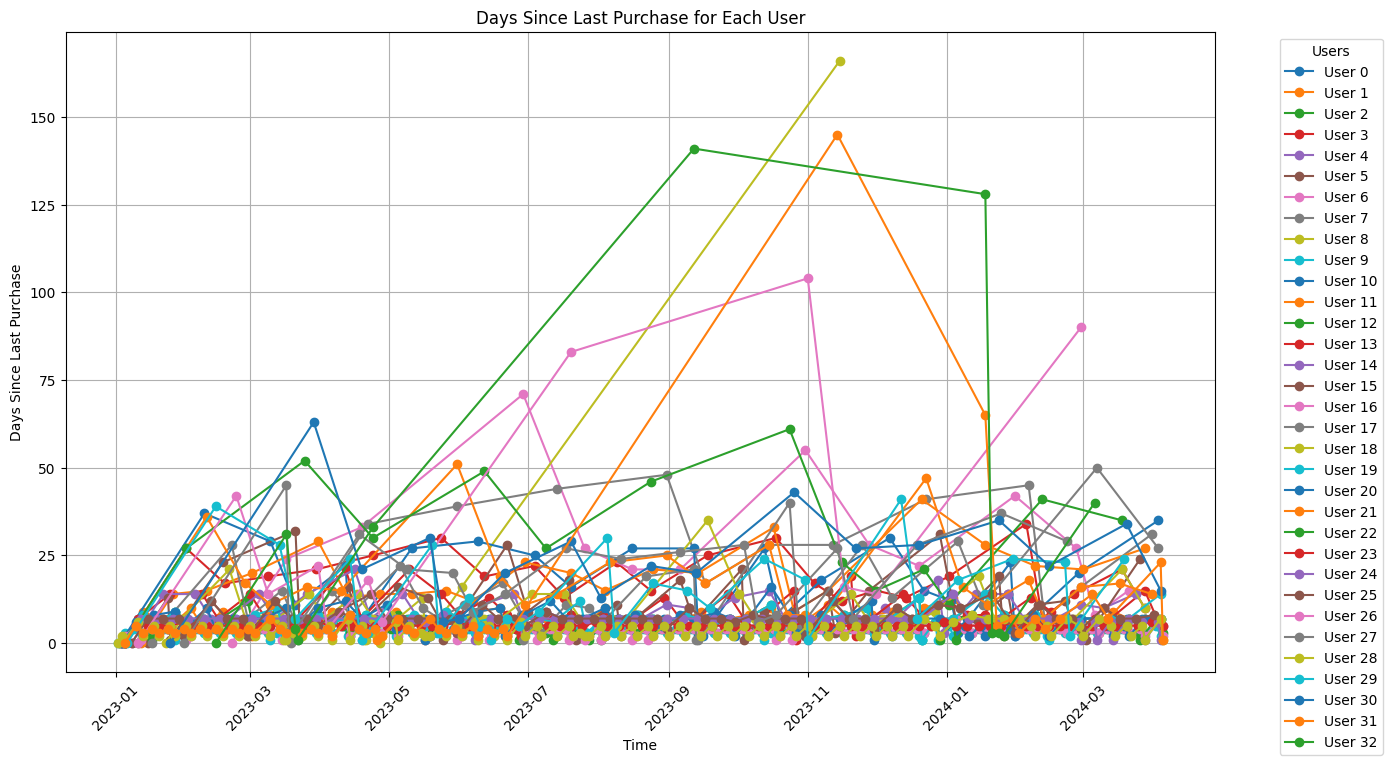

In [ ]:
df_filtered['time'] = pd.to_datetime(df_filtered['time'])
df_filtered = df_filtered.sort_values(by=['user', 'time'])
plt.figure(figsize=(14, 8))
for user in df_filtered['user'].unique():
    user_data = df_filtered[df_filtered['user'] == user]
    plt.plot(user_data['time'], user_data['days_since_last_purchase'], marker='o', label=f'User {user}')

plt.title('Days Since Last Purchase for Each User')
plt.xlabel('Time')
plt.ylabel('Days Since Last Purchase')
plt.xticks(rotation=45)
plt.legend(title='Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

Available users: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Please enter the user ID you want to visualize: 1


<ipython-input-24-0d4e212c085c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['days_since_start'] = (user_data['time'] - user_data['time'].min()).dt.days


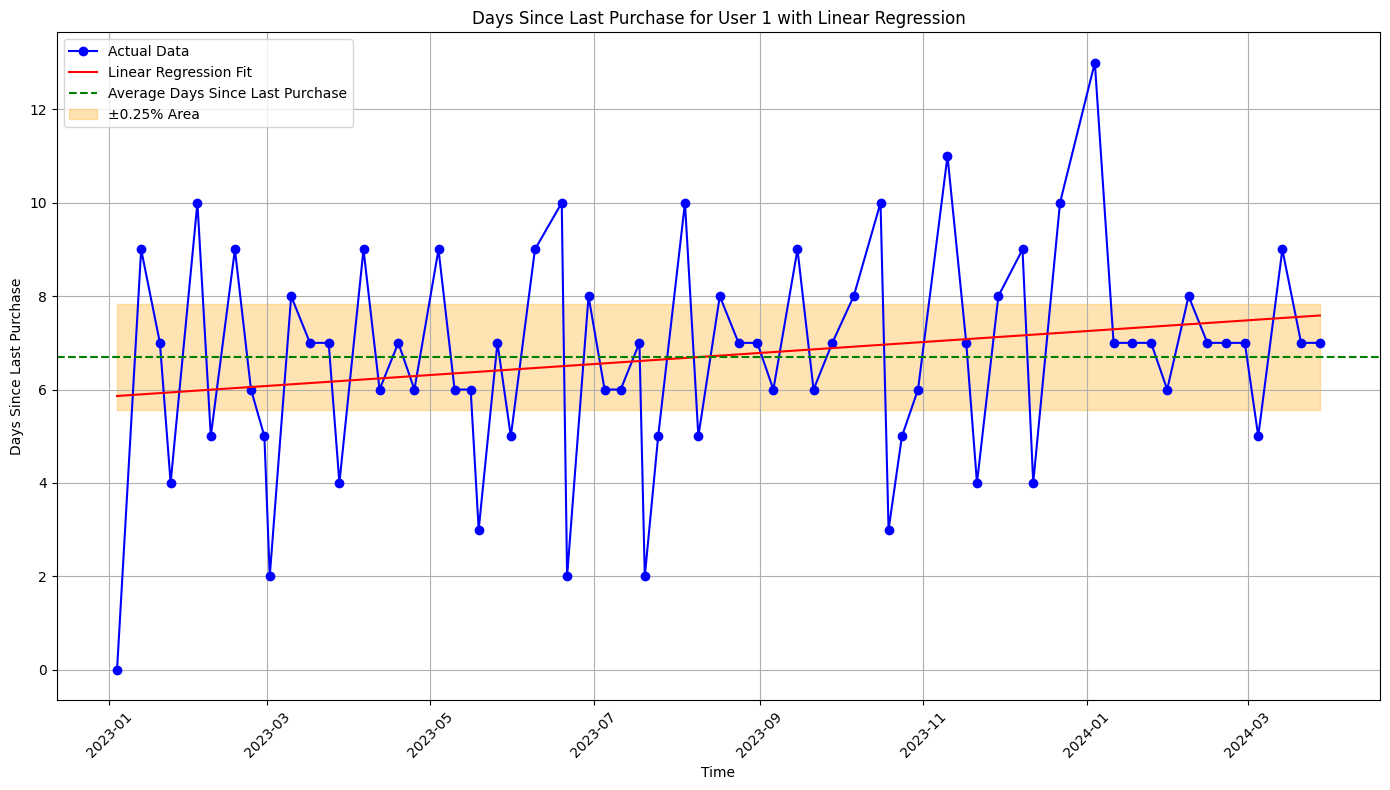

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df_filtered['time'] = pd.to_datetime(df_filtered['time'])

df_filtered = df_filtered.sort_values(by=['user', 'time'])

unique_users = df_filtered['user'].unique()

print("Available users:", unique_users)
selected_user = int(input("Please enter the user ID you want to visualize: "))

if selected_user in unique_users:
    # Step 7: Filter data for the selected user
    user_data = df_filtered[df_filtered['user'] == selected_user]

    # Step 8: Prepare data for linear regression
    # Convert dates to numerical values (days since start)
    user_data['days_since_start'] = (user_data['time'] - user_data['time'].min()).dt.days

    X = user_data['days_since_start'].values.reshape(-1, 1)  # Feature
    y = user_data['days_since_last_purchase'].values  # Target


    model = LinearRegression()
    model.fit(X, y)


    y_pred = model.predict(X)

    average_days_since_last_purchase = user_data['days_since_last_purchase'].mean()

    #Calculate the area bounds (+0.25% and -0.25% of the mean)
    lower_bound = average_days_since_last_purchase * (1 - 0.17)
    upper_bound = average_days_since_last_purchase * (1 + 0.17)


    plt.figure(figsize=(14, 8))

    plt.plot(user_data['time'], user_data['days_since_last_purchase'], marker='o', label='Actual Data', color='blue')
    plt.plot(user_data['time'], y_pred, label='Linear Regression Fit', color='red')


    plt.axhline(y=average_days_since_last_purchase, color='green', linestyle='--', label='Average Days Since Last Purchase')


    plt.fill_between(user_data['time'], lower_bound, upper_bound, color='orange', alpha=0.3, label='±0.25% Area')


    plt.title(f'Days Since Last Purchase for User {selected_user} with Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Days Since Last Purchase')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()


    plt.tight_layout()
    plt.show()
else:
    print("Invalid user ID selected.")
